# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Instructions/output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# see example json for places of items
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}&units=imperial&q="
response = requests.get(query_url + "atlanta").json()
pprint(response)

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 33.749, 'lon': -84.388},
 'dt': 1635016080,
 'id': 4180439,
 'main': {'feels_like': 71.1,
          'humidity': 38,
          'pressure': 1017,
          'temp': 72.37,
          'temp_max': 75.96,
          'temp_min': 68.41},
 'name': 'Atlanta',
 'sys': {'country': 'US',
         'id': 2006620,
         'sunrise': 1634989739,
         'sunset': 1635029664,
         'type': 2},
 'timezone': -14400,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 0, 'gust': 5.01, 'speed': 1.01}}


In [5]:
url2 = "http://api.openweathermap.org/data/2.5/weather?"
query_url2 = f"{url2}appid={weather_api_key}&units=imperial&q="

# set up lists to hold response info
max_temp = []
humidity = []
clouds = []
wind_speed = []
country = []
date = []
found_city = []
latitude = []
longitude = []

print('Beginning Data Retrieval')
print('---------------------------------')

# loop through list of cities and perform request for data on each
for i in range(len(cities)):
    city = cities[i]
        
    # create search query, make request, and store in json
    weather_response = requests.get(query_url2 + city).json()
    
    # handle exceptions for a city that is not available/found
    try:
        # grab required information
        max_temp.append(weather_response['main']['temp_max'])
        humidity.append(weather_response['main']['humidity'])
        clouds.append(weather_response['clouds']['all'])
        wind_speed.append(weather_response['wind']['speed'])
        country.append(weather_response['sys']['country'])
        date.append(weather_response['dt'])
        found_city.append(city)
        latitude.append(weather_response['coord']['lat'])
        longitude.append(weather_response['coord']['lon'])
        print(f'Processing Record {i+1} of {len(cities)} | {city}')
                
    except:
        print('City not found. Skipping...')

Beginning Data Retrieval
---------------------------------
Processing Record 1 of 609 | vila velha
Processing Record 2 of 609 | kahului
City not found. Skipping...
Processing Record 4 of 609 | ponta do sol
Processing Record 5 of 609 | rikitea
Processing Record 6 of 609 | bathsheba
City not found. Skipping...
Processing Record 8 of 609 | swift current
Processing Record 9 of 609 | busselton
Processing Record 10 of 609 | cherskiy
Processing Record 11 of 609 | hasaki
Processing Record 12 of 609 | hobart
Processing Record 13 of 609 | qaanaaq
Processing Record 14 of 609 | barrow
Processing Record 15 of 609 | saldanha
Processing Record 16 of 609 | barcelos
Processing Record 17 of 609 | longhua
Processing Record 18 of 609 | takhli
Processing Record 19 of 609 | mataura
Processing Record 20 of 609 | yellowknife
Processing Record 21 of 609 | lata
Processing Record 22 of 609 | ancud
Processing Record 23 of 609 | ushuaia
Processing Record 24 of 609 | bambous virieux
Processing Record 25 of 609 | ca

Processing Record 211 of 609 | zaykovo
Processing Record 212 of 609 | brae
Processing Record 213 of 609 | port elizabeth
Processing Record 214 of 609 | bose
Processing Record 215 of 609 | nueva concepcion
Processing Record 216 of 609 | tambura
Processing Record 217 of 609 | acapulco
City not found. Skipping...
City not found. Skipping...
Processing Record 220 of 609 | lillebonne
Processing Record 221 of 609 | betanzos
Processing Record 222 of 609 | ocos
Processing Record 223 of 609 | miri
Processing Record 224 of 609 | codrington
Processing Record 225 of 609 | berlevag
Processing Record 226 of 609 | dongying
Processing Record 227 of 609 | turukhansk
Processing Record 228 of 609 | pachino
Processing Record 229 of 609 | miraflores
Processing Record 230 of 609 | cap malheureux
Processing Record 231 of 609 | saint-joseph
Processing Record 232 of 609 | port hedland
Processing Record 233 of 609 | linares
Processing Record 234 of 609 | wanning
City not found. Skipping...
Processing Record 236

Processing Record 422 of 609 | yavas
Processing Record 423 of 609 | semey
City not found. Skipping...
Processing Record 425 of 609 | liberia
Processing Record 426 of 609 | nyurba
Processing Record 427 of 609 | asyut
City not found. Skipping...
Processing Record 429 of 609 | imeni poliny osipenko
Processing Record 430 of 609 | santa rosa
Processing Record 431 of 609 | yumen
Processing Record 432 of 609 | coihaique
Processing Record 433 of 609 | sao filipe
Processing Record 434 of 609 | ontario
Processing Record 435 of 609 | havelock
Processing Record 436 of 609 | bom jesus
Processing Record 437 of 609 | isangel
Processing Record 438 of 609 | kommunar
City not found. Skipping...
Processing Record 440 of 609 | ballina
Processing Record 441 of 609 | suez
City not found. Skipping...
Processing Record 443 of 609 | ust-uda
Processing Record 444 of 609 | college
Processing Record 445 of 609 | labuhan
Processing Record 446 of 609 | shenzhen
Processing Record 447 of 609 | joshimath
Processing Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weatherDF = pd.DataFrame(
    {
        "City": found_city,
        "Lat": latitude,
        "Lng": longitude,
        "Max Temp": max_temp,
        "Humidity": humidity,
        "Cloudiness": clouds,
        "Wind Speed": wind_speed,
        "Country": country,
        "Date": date
    }
)

weatherDF.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vila velha,-20.3297,-40.2925,78.75,69,40,14.97,BR,1635016282
1,kahului,20.8947,-156.4700,81.66,78,40,14.97,US,1635016283
2,ponta do sol,32.6667,-17.1000,70.43,53,24,4.52,PT,1635016283
3,rikitea,-23.1203,-134.9692,74.77,82,96,20.58,PF,1635016283
4,bathsheba,13.2167,-59.5167,86.61,66,40,21.85,BB,1635016284


In [7]:
# export city data into a csv file
weatherDF.to_csv(output_data_file)

In [8]:
# summary stats table
weatherDF[["Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Date"]].describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,5.490000e+02
mean,20.614170,19.202451,59.837395,71.693989,57.714026,8.129745,1.635016e+09
std,33.362262,90.378683,21.214566,19.969986,41.122483,5.710077,7.024255e+01
min,-54.800000,-175.200000,-14.220000,5.000000,0.000000,0.000000,1.635016e+09
25%,-6.981100,-57.752800,45.370000,61.000000,12.000000,3.800000,1.635016e+09
50%,22.890900,24.927500,62.850000,76.000000,75.000000,6.890000,1.635016e+09
75%,49.750200,97.400000,76.840000,87.000000,100.000000,11.250000,1.635016e+09
max,78.218600,178.416700,98.260000,100.000000,100.000000,36.820000,1.635016e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#see how many rows and columns
weatherDF.shape

(549, 9)

In [10]:
# check for indices of cities with humidity over 100%
highHum = weatherDF.index[weatherDF['Humidity']>100]
highHum

Int64Index([], dtype='int64')

In [11]:
# new DF with dropped humidity
clean_city_data = weatherDF.loc[weatherDF["Humidity"] <= 100]

In [12]:
# check to see if row number changed
clean_city_data.shape

(549, 9)

In [13]:
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vila velha,-20.3297,-40.2925,78.75,69,40,14.97,BR,1635016282
1,kahului,20.8947,-156.4700,81.66,78,40,14.97,US,1635016283
2,ponta do sol,32.6667,-17.1000,70.43,53,24,4.52,PT,1635016283
3,rikitea,-23.1203,-134.9692,74.77,82,96,20.58,PF,1635016283
4,bathsheba,13.2167,-59.5167,86.61,66,40,21.85,BB,1635016284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

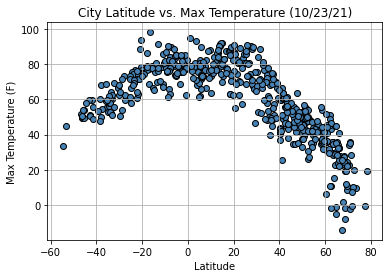

In [14]:
# Create a scatter plot for latitude vs. temperature
x_values = clean_city_data['Lat']
y_values = clean_city_data['Max Temp']
plt.scatter(x_values, y_values, marker='o', facecolors='steelblue', edgecolors='black')

# create labels for chart
plt.title('City Latitude vs. Max Temperature (10/23/21)')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')

# show grid
plt.grid()

# save image of chart
plt.savefig('Instructions/output_data/Fig1.png')
plt.show()

This plot is analyzing the relationship between the cities' latitude and max temperature. In this instance we can infer that the closer to the equator (latitude of 0) we get, the higher the max temperatures.

## Latitude vs. Humidity Plot

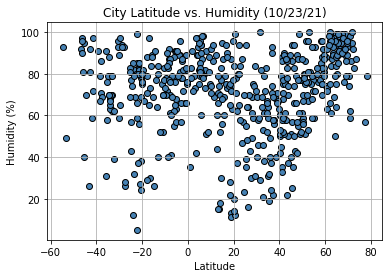

In [15]:
# Create a scatter plot for latitude vs. humidity
x_values = clean_city_data['Lat']
y_values = clean_city_data['Humidity']
plt.scatter(x_values, y_values, marker='o', facecolors='steelblue', edgecolors='black')

# create labels for chart
plt.title('City Latitude vs. Humidity (10/23/21)')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')

# show grid
plt.grid()

# save image of chart
plt.savefig('Instructions/output_data/Fig2.png')
plt.show()

This plot is analyzing the relationship between the cities' latitude and humidities. Based on this chart, we can see that latitude does not affect humidity rates. Humidity is a wide range across all latitude points.

## Latitude vs. Cloudiness Plot

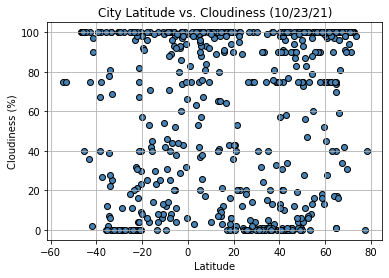

In [16]:
# Create a scatter plot for latitude vs. cloudiness
x_values = clean_city_data['Lat']
y_values = clean_city_data['Cloudiness']
plt.scatter(x_values, y_values, marker='o', facecolors='steelblue', edgecolors='black')

# create labels for chart
plt.title('City Latitude vs. Cloudiness (10/23/21)')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')

# show grid
plt.grid()

# save image of chart
plt.savefig('Instructions/output_data/Fig3.png')
plt.show()

This plot is analyzing the relationship between the cities' latitude and cloudiness. Much like latitude vs. humidity, latitude does not affect cloudiness. Cloudiness is a wide range across all latitude points.

## Latitude vs. Wind Speed Plot

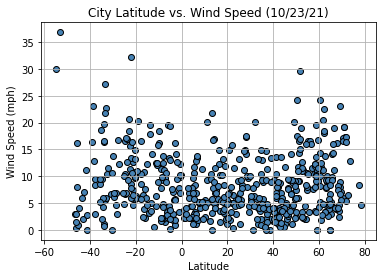

In [17]:
# Create a scatter plot for latitude vs. wind speed
x_values = clean_city_data['Lat']
y_values = clean_city_data['Wind Speed']
plt.scatter(x_values, y_values, marker='o', facecolors='steelblue', edgecolors='black')

# create labels for chart
plt.title('City Latitude vs. Wind Speed (10/23/21)')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')

# show grid
plt.grid()

# save image of chart
plt.savefig('Instructions/output_data/Fig4.png')
plt.show()

This plot is analyzing the relationship between the cities' latitude and wind speed. In this instance we can infer that the furthest from the equator (latitude of 0) we get, we see some of the highest wind speeds, especially in the Southern hemisphere.

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [18]:
# create DF only using Northern hemisphere data
northHem = clean_city_data.loc[clean_city_data["Lat"] > 0]

The r-value is: 0.7567633525659762


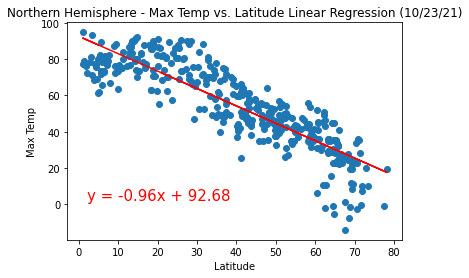

In [19]:
# Add the linear regression equation
x_values = northHem['Lat']
y_values = northHem['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Add line to plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values, y_values)

# Plot regression line
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (2,2), fontsize=15, color='r')

# Label plot
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression (10/23/21)')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Print r squared value
print(f'The r-value is: {rvalue**2}')

# save fig
plt.savefig('Instructions/output_data/Fig5.png')

# Show plot
plt.show()

This chart shows the linear regression between the northern hemisphere's latitude versus its max temperatures. As you can see from the chart, the higher north you go, the lower the max temperatures are. In this dataset, the r-value is 0.76 which proves there is a strong correlation between latitude and max temperatures in the northern hemisphere.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [20]:
# create DF only using Southern hemisphere data
southHem = clean_city_data.loc[clean_city_data["Lat"] < 0]

The r-value is: 0.6405088591797361


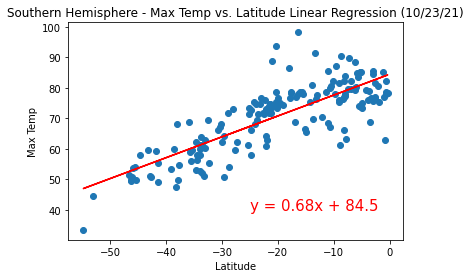

In [21]:
# Add the linear regression equation
x_values = southHem['Lat']
y_values = southHem['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Add line to plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values, y_values)

# Plot regression line
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-25,40), fontsize=15, color='r')

# Label plot
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression (10/23/21)')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Print r squared value
print(f'The r-value is: {rvalue**2}')

# save fig
plt.savefig('Instructions/output_data/Fig6.png')

# Show plot
plt.show()

This chart shows the linear regression between the southern hemisphere's latitude versus its max temperatures. As you can see from the chart, as you get closer to the equator, the max temperatures increases. In this dataset, the r-value is 0.64 which means there is a correlation between latitude and max temperatures in the southern hemisphere. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.05797051540421358


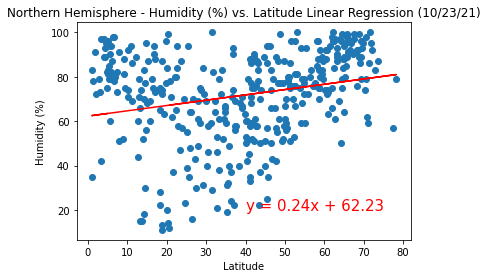

In [22]:
# Add the linear regression equation
x_values = northHem['Lat']
y_values = northHem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Add line to plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values, y_values)

# Plot regression line
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (40,20), fontsize=15, color='r')

# Label plot
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression (10/23/21)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Print r squared value
print(f'The r-value is: {rvalue**2}')

# save fig
plt.savefig('Instructions/output_data/Fig7.png')

# Show plot
plt.show()

This chart shows the linear regression between the northern hemisphere's latitude versus its humidity. As you can see from the chart, there is a wide spread of humidity values in comparison to the latitudes. In this dataset, the r-value is 0.58 which means there is not a strong correlation between latitude and humidity in the northern hemisphere. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0008185822381456022


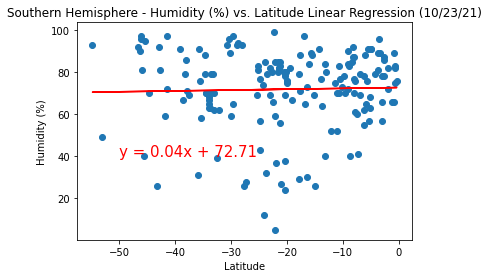

In [23]:
# Add the linear regression equation
x_values = southHem['Lat']
y_values = southHem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Add line to plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values, y_values)

# Plot regression line
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-50,40), fontsize=15, color='r')

# Label plot
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression (10/23/21)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Print r squared value
print(f'The r-value is: {rvalue**2}')

# save fig
plt.savefig('Instructions/output_data/Fig8.png')

# Show plot
plt.show()

This chart shows the linear regression between the southern hemisphere's latitude versus its humidity. As you can see from the chart, there is a wide spread of humidity values in comparison to the latitudes. In this dataset, the r-value is 0.001 which means there is not a strong correlation between latitude and humidity in the southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.022271260719503524


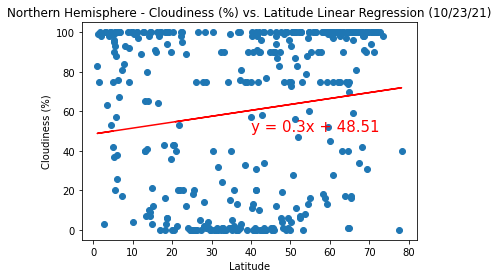

In [24]:
# Add the linear regression equation
x_values = northHem['Lat']
y_values = northHem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Add line to plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values, y_values)

# Plot regression line
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (40,50), fontsize=15, color='r')

# Label plot
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression (10/23/21)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Print r squared value
print(f'The r-value is: {rvalue**2}')

# save fig
plt.savefig('Instructions/output_data/Fig9.png')

# Show plot
plt.show()

This chart shows the linear regression between the northern hemisphere's latitude versus its cloudiness. As you can see from the chart, there is a wide spread of cloudiness values in comparison to the latitudes. In this dataset, the r-value is 0.02 which means there is hardly any correlation between latitude and cloudiness in the northern hemisphere. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0009981987833249926


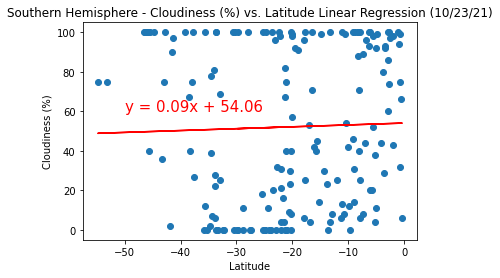

In [26]:
# Add the linear regression equation
x_values = southHem['Lat']
y_values = southHem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Add line to plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values, y_values)

# Plot regression line
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-50,60), fontsize=15, color='r')

# Label plot
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression (10/23/21)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Print r squared value
print(f'The r-value is: {rvalue**2}')

# save fig
plt.savefig('Instructions/output_data/Fig10.png')

# Show plot
plt.show()

This chart shows the linear regression between the southern hemisphere's latitude versus its cloudiness. As you can see from the chart, there is a wide spread of cloudiness values in comparison to the latitudes. In this dataset, the r-value is 0.001 which means there is virtually no correlation between latitude and cloudiness in the southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.052006351471046895


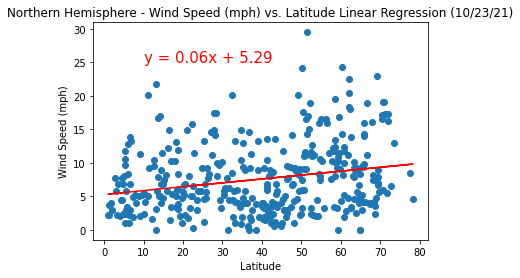

In [27]:
# Add the linear regression equation
x_values = northHem['Lat']
y_values = northHem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Add line to plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values, y_values)

# Plot regression line
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (10,25), fontsize=15, color='r')

# Label plot
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression (10/23/21)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Print r squared value
print(f'The r-value is: {rvalue**2}')

# save fig
plt.savefig('Instructions/output_data/Fig11.png')

# Show plot
plt.show()

This chart shows the linear regression between the northern hemisphere's latitude versus its wind speed. As you can see from the chart, most of the latitudes have similar wind speeds. In this dataset, the r-value is 0.05 which means there is not a strong correlation between latitude and wind speed in the northern hemisphere. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.020425333723283125


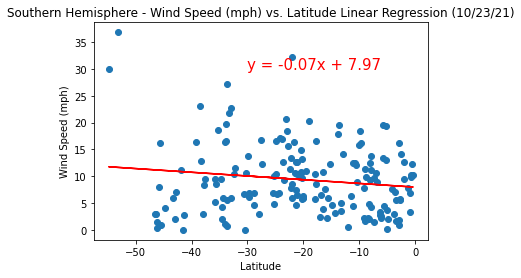

In [28]:
# Add the linear regression equation
x_values = southHem['Lat']
y_values = southHem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Add line to plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values, y_values)

# Plot regression line
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-30,30), fontsize=15, color='r')

# Label plot
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression (10/23/21)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Print r squared value
print(f'The r-value is: {rvalue**2}')

# save fig
plt.savefig('Instructions/output_data/Fig12.png')

# Show plot
plt.show()

This chart shows the linear regression between the southern hemisphere's latitude versus its wind speed. As you can see from the chart, most of the latitudes have similar wind speeds. In this dataset, the r-value is 0.02 which means there is not a strong correlation between latitude and wind speed in the southern hemisphere. There are some outliers when you go further south which causes there to be a slight slope in the line.

Observations:

    1) As you get closer to a latitude of 0, the max temperatures get higher. This is true because a latitude of 0 is the equator and the equator is closer to the sun which creates higher temperatures for that area.

    2) Most latitudes appear to have average wind speeds, but around -60 and 60 degrees latitude, you see a spike in wind speeds. This can be explained by temperature changes. The winds blowing from 30 degrees to 60 degrees in both hemispheres blow towards their respective poles. This air is warm air while the wind blowing from the poles towards the equator is cold air. When this air mixes (around the 60 degree marks on both northern and southern hemispheres), the wind speeds increase.
    
    3) Clouds vary across all latitudes as in all cities, you will see clouds at some point. Therefore there is no correlation in latitude and cloudiness.